##Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Data Collection and Analysis

In [4]:
#Loading the data from csv file to pandas Dataframe
insurance_dataset = pd.read_csv("/content/insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Number of Rows and Columns
insurance_dataset.shape

(1338, 7)

In [6]:
#Some Information about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#Checking the null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Analysis

In [8]:
# Statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-14-df42099b4225>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset["age"])


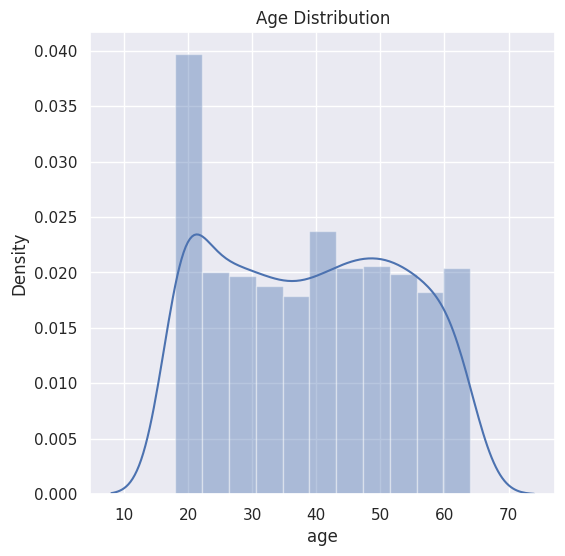

In [14]:
# Distribution of each column
sns.set()
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset["age"])
plt.title("Age Distribution");

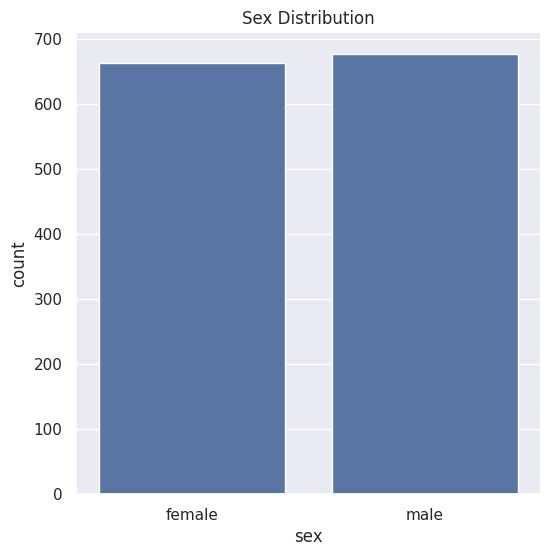

In [17]:
# Distribution of Gender column
plt.figure(figsize=(6, 6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title("Sex Distribution")
plt.show()



In [18]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<ipython-input-29-021872066044>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


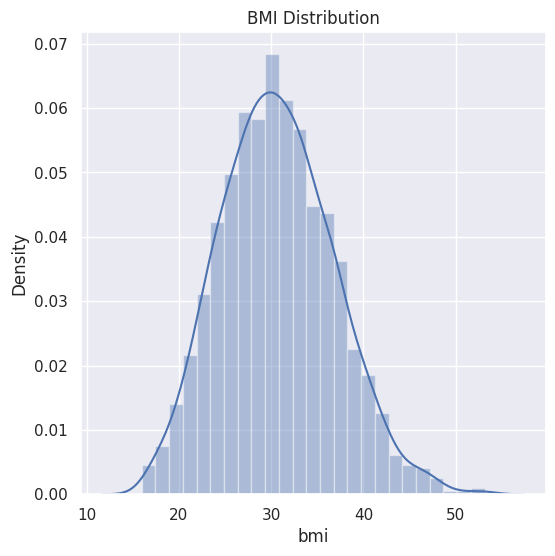

In [29]:
# Distribution of bmi distribution
plt.figure(figsize=(6, 6))
sns.distplot(insurance_dataset['bmi'])
plt.title("BMI Distribution")
plt.show()

Noraml BMI Range --> 18.5 to 24.9

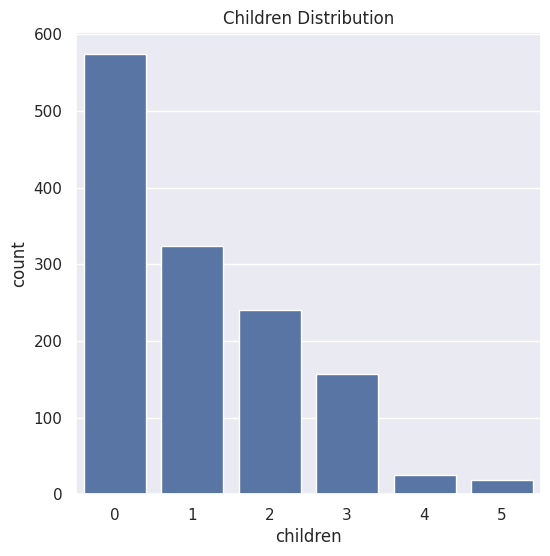

In [30]:
# Children Column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title("Children Distribution")
plt.show()

In [31]:
insurance_dataset["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

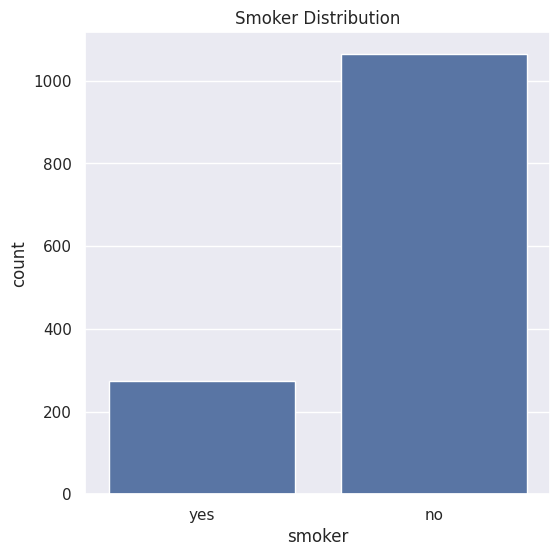

In [32]:
# Distribution of Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title("Smoker Distribution")
plt.show()

In [33]:
insurance_dataset["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

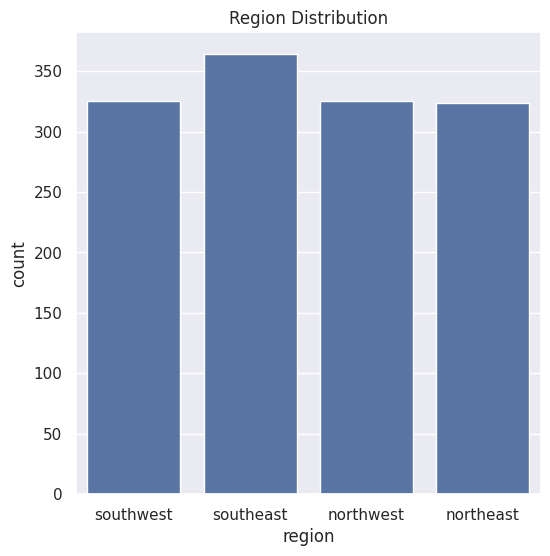

In [34]:
# Distribution of Region Column
plt.figure(figsize=(6,6))
sns.countplot(x="region", data=insurance_dataset)
plt.title("Region Distribution")
plt.show()

In [35]:
insurance_dataset["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-40-fb5675a7458e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


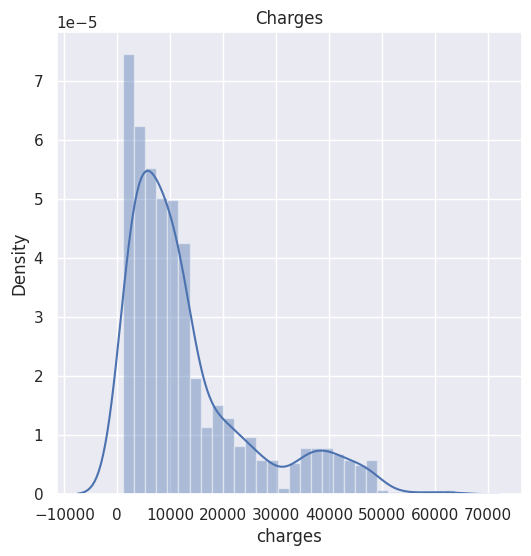

In [40]:
#Distribution of Charges Column
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title("Charges")
plt.show()

In [37]:
insurance_dataset['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

## Data Preprocessing

In [41]:
#Encoding the categorical features

# Encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

#Encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

#Encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)

In [42]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


##Spliting the features and targets

In [43]:
x = insurance_dataset.drop(columns="charges", axis=1)
y = insurance_dataset["charges"]

In [44]:
print(x)
print(y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Spliting the dataset into training and dataset

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [75]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

In [76]:
model = LinearRegression()

In [77]:
model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [79]:
#prediction on training data
training_data_prediction = model.predict(x_train)


In [83]:
# R2 Squared error
r2_train = metrics.r2_score(y_train, training_data_prediction)
print("R squared error :",r2_train)

R squared error : 0.751505643411174


In [82]:
#prediction on testing data
test_data_prediction = model.predict(x_test)

In [84]:
r2_test = metrics.r2_score(y_test, test_data_prediction)
print("R squared error :", r2_test)

R squared error : 0.7447273869684076


## Building a predictive system

In [89]:
input_data = (31,1,25.74,0,1,0)

# Changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print("The medical insurance cost is USD", prediction[0])

The medical insurance cost is USD 3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
